## Data

Before running this notebook, be sure to follow these steps:

1. Download the `VM2Uniform--MA--2022-08-19` zip from https://drive.google.com/drive/folders/1DyCevtTWTMMNrZXsCycLGiSA_uc6lq8r

2. Extract `VM2Uniform--MA--2022-08-19.tab` to `../data/VM2--MA--2022-08-19/`

3. Run `deliverable_1.ipynb` to generate the GEOID10 to Social Vulnerability Index table

In [1]:
import pandas as pd
import numpy as np

In [4]:
suffolk_start_idx = 3500000
num_rows = 500000

uniform_2022_MA = pd.read_csv("../data/VM2Uniform--MA--2022-08-19.tab", delimiter="\t", skiprows= range(1, suffolk_start_idx), nrows=num_rows, encoding = "ISO-8859-1")

C:\Users\ivanb\AppData\Local\Temp\ipykernel_1644\2560405300.py:4: DtypeWarning: Columns (19,26,27,30,31,50,57,58,61,62,78,87,88,89,90,91,92,93,113,114,115,117,126,392,393,396,400,401,402,403,404,406,408,409,411,412,414,421,422,423,430,431,433,438,444,445,446,447,448,451,453,454,458,459,463,465,468,473,474,479,481,697,702,706,711,715,720,729,733,738,742,746,747) have mixed types. Specify dtype option on import or set low_memory=False.
  uniform_2022_MA = pd.read_csv("../data/VM2Uniform--MA--2022-08-19.tab", delimiter="\t", skiprows= range(1, suffolk_start_idx), nrows=num_rows, encoding = "ISO-8859-1")


In [5]:
uniform_subset = uniform_2022_MA[["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]
uniform_subset.dropna(subset=["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"], inplace=True)

C:\Users\ivanb\AppData\Local\Temp\ipykernel_1644\4053427370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_subset.dropna(subset=["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"], inplace=True)


In [6]:
# only keep SUFFOLK
uniform_subset = uniform_subset[uniform_subset["Voters_FIPS"] == 25]
uniform_subset

,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
57508,LALMA517946293,SUFFOLK,25,60101.0,1001.0,NaN,Y,NaN,NaN,NaN,NaN
57509,LALMA609604397,SUFFOLK,25,60101.0,1001.0,NaN,NaN,NaN,NaN,NaN,NaN
57510,LALMA160664286,SUFFOLK,25,140300.0,1003.0,NaN,Y,NaN,NaN,NaN,Y
57511,LALMA159121848,SUFFOLK,25,140300.0,1003.0,NaN,NaN,Y,Y,Y,Y
57512,LALMA410229705,SUFFOLK,25,60501.0,2002.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
499995,LALMA641073210,SUFFOLK,25,180101.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN
499996,LALMA609619062,SUFFOLK,25,180101.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN
499997,LALMA162390979,SUFFOLK,25,180101.0,2003.0,NaN,Y,Y,NaN,NaN,NaN
499998,LALMA160909701,SUFFOLK,25,180101.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# replace voter NAN with 0 Y with 1

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace(np.nan, 0)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace("Y", 1)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]

,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
57508,0.0,1,0,0,0,0
57509,0.0,0,0,0,0,0
57510,0.0,1,0,0,0,1
57511,0.0,0,1,1,1,1
57512,0.0,0,0,0,0,0
...,...,...,...,...,...,...
499995,0.0,0,0,0,0,0
499996,0.0,0,0,0,0,0
499997,0.0,1,1,0,0,0
499998,0.0,0,0,0,0,0


In [8]:
# convert to int first
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(int)

# then to string
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(str)

In [9]:
uniform_subset["Voters_FIPS"] = uniform_subset["Voters_FIPS"].str.zfill(3)
uniform_subset

uniform_subset["Residence_Addresses_CensusTract"] = uniform_subset["Residence_Addresses_CensusTract"].str.zfill(5)
uniform_subset

uniform_subset["Residence_Addresses_CensusBlock"] = uniform_subset["Residence_Addresses_CensusBlock"].str.zfill(4)
uniform_subset

,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
57508,LALMA517946293,SUFFOLK,025,60101,1001,0.0,1,0,0,0,0
57509,LALMA609604397,SUFFOLK,025,60101,1001,0.0,0,0,0,0,0
57510,LALMA160664286,SUFFOLK,025,140300,1003,0.0,1,0,0,0,1
57511,LALMA159121848,SUFFOLK,025,140300,1003,0.0,0,1,1,1,1
57512,LALMA410229705,SUFFOLK,025,60501,2002,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
499995,LALMA641073210,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0
499996,LALMA609619062,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0
499997,LALMA162390979,SUFFOLK,025,180101,2003,0.0,1,1,0,0,0
499998,LALMA160909701,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0


https://www.mass.gov/info-details/massgis-data-2010-us-census

The tables in each of the aforementioned databases all contain the field LOGRECNO which serves as the unique identifier for the purpose of linking to the various 2010 Census geographies provided by MassGIS.  Furthermore, most of the tables also contain a GEOID10 field added by MassGIS that represents a unique geographic  ID and is generated by a concatenation of constituent geography codes:

i.e. 250092213001002 = STATE CODE (“25” for MA) + COUNTY (“009” – Essex County) + CENSUS TRACT (“221300”) + CENSUS BLOCK (“1002”)

In [10]:
# we only focus on CENSUS TRACT here

uniform_subset["GEOID10"] = str(25) + uniform_subset["Voters_FIPS"] + uniform_subset["Residence_Addresses_CensusTract"] # + uniform_subset["Residence_Addresses_CensusBlock"]
print(f'found {len(uniform_subset["GEOID10"].unique())} unique GEOIDs')
uniform_subset

found 230 unique GEOIDs


,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002,GEOID10
57508,LALMA517946293,SUFFOLK,025,60101,1001,0.0,1,0,0,0,0,2502560101
57509,LALMA609604397,SUFFOLK,025,60101,1001,0.0,0,0,0,0,0,2502560101
57510,LALMA160664286,SUFFOLK,025,140300,1003,0.0,1,0,0,0,1,25025140300
57511,LALMA159121848,SUFFOLK,025,140300,1003,0.0,0,1,1,1,1,25025140300
57512,LALMA410229705,SUFFOLK,025,60501,2002,0.0,0,0,0,0,0,2502560501
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,LALMA641073210,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0,25025180101
499996,LALMA609619062,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0,25025180101
499997,LALMA162390979,SUFFOLK,025,180101,2003,0.0,1,1,0,0,0,25025180101
499998,LALMA160909701,SUFFOLK,025,180101,2003,0.0,0,0,0,0,0,25025180101


In [11]:
total_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).count()
voted_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).sum()

In [12]:
# turnout
turnout_per_year_by_GEOID10 = voted_voters / total_voters

# save
turnout_per_year_by_GEOID10.to_csv("turnout_per_year_by_GEOID10.csv")

turnout_per_year_by_GEOID10 = turnout_per_year_by_GEOID10.reset_index()
turnout_per_year_by_GEOID10["GEOID10"] = turnout_per_year_by_GEOID10["GEOID10"].astype(np.int64)

turnout_per_year_by_GEOID10

,GEOID10,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,2502500101,0.0,0.476871,0.223717,0.185029,0.164844,0.134567
1,2502500102,0.0,0.374643,0.192461,0.159909,0.141633,0.105654
2,2502500201,0.0,0.502951,0.249157,0.215008,0.171164,0.143339
3,2502500202,0.0,0.454966,0.264310,0.240320,0.210859,0.179293
4,2502500301,0.0,0.519380,0.301218,0.259136,0.218715,0.191030
...,...,...,...,...,...,...,...
225,25025981201,0.0,0.375000,0.250000,0.000000,0.000000,0.125000
226,25025981202,0.0,0.451613,0.290323,0.225806,0.193548,0.258065
227,25025981502,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
228,25025981700,0.0,0.857143,0.285714,0.428571,0.571429,0.428571


In [14]:
calls_svidx_df = pd.read_csv("../data/calls_svidx_df.csv").drop(["Unnamed: 0"], axis=1)

calls_svidx_df

,CT_ID_10,NUM_CALLS,POP100_RE,Name,SV_IDX,CALLS_PER_POP
0,25025000100,18353,4254,Brighton,0.302320,4.314292
1,25025000201,13992,3854,Brighton,0.209524,3.630514
2,25025000202,13251,3885,Brighton,0.398954,3.410811
3,25025000301,10379,2740,Brighton,0.274417,3.787956
4,25025000302,10431,3142,Brighton,0.319505,3.319860
...,...,...,...,...,...,...
172,25025981202,2067,207,South Boston Waterfront,0.000000,9.985507
173,25025981300,1174,389,East Boston,0.111411,3.017995
174,25025981501,795,12,Back Bay,0.072193,66.250000
175,25025981502,91,9,East Boston,0.018031,10.111111


In [39]:
svidx_voter_turnout = calls_svidx_df.join(turnout_per_year_by_GEOID10.set_index('GEOID10'), on='CT_ID_10')

subset_svidx_voter_turnout = svidx_voter_turnout.dropna()

subset_svidx_voter_turnout.head()

,CT_ID_10,NUM_CALLS,POP100_RE,Name,SV_IDX,CALLS_PER_POP,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
121,25025100100,15519,5510,Roxbury,0.863899,2.816515,0.0,0.358200,0.272899,0.247403,0.201448,0.131571
122,25025100200,9033,2787,Mattapan,0.559635,3.241119,0.0,0.398738,0.285141,0.279977,0.249570,0.168675
123,25025100300,11487,3303,Mattapan,0.774576,3.477748,0.0,0.407649,0.307258,0.295524,0.264668,0.179922
124,25025100400,17362,4865,Mattapan,0.587071,3.568756,0.0,0.488506,0.352995,0.338778,0.296431,0.208409
125,25025100500,28227,5989,Dorchester,0.545204,4.713141,0.0,0.430063,0.290652,0.255393,0.219903,0.159128


In [40]:
# save data to csv

subset_svidx_voter_turnout.to_csv("../data/subset_svidx_voter_turnout.csv")

In [41]:
subset_svidx_voter_turnout = pd.read_csv("../data/subset_svidx_voter_turnout.csv")

In [45]:
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2018"] > 0]
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2018"] < 1]

subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2014"] > 0]
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2014"] < 1]

subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2010"] > 0]
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2010"] < 1]

subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2006"] > 0]
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2006"] < 1]

subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2002"] > 0]
subset_svidx_voter_turnout = subset_svidx_voter_turnout[subset_svidx_voter_turnout["General_2002"] < 1]

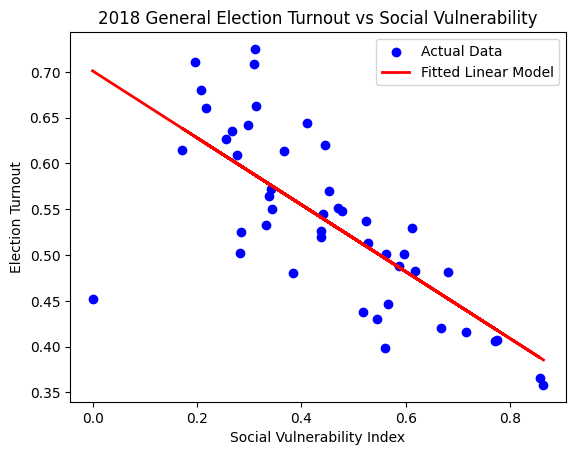

In [51]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

x = subset_svidx_voter_turnout["SV_IDX"].to_numpy().reshape(-1, 1)
y = subset_svidx_voter_turnout["General_2018"].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Create the scatterplot
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot the linear model
plt.plot(x, y_pred, color='red', linewidth=2, label="Fitted Linear Model")

# Customize the plot
plt.title("2018 General Election Turnout vs Social Vulnerability")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Election Turnout")
plt.legend()

# Show the plot
plt.show()

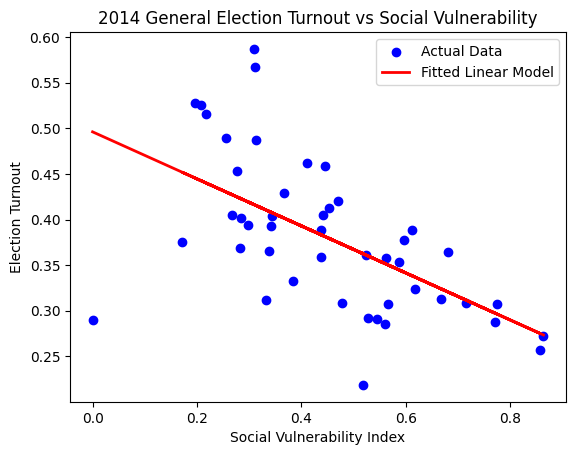

In [52]:
x = subset_svidx_voter_turnout["SV_IDX"].to_numpy().reshape(-1, 1)
y = subset_svidx_voter_turnout["General_2014"].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Create the scatterplot
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot the linear model
plt.plot(x, y_pred, color='red', linewidth=2, label="Fitted Linear Model")

# Customize the plot
plt.title("2014 General Election Turnout vs Social Vulnerability")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Election Turnout")
plt.legend()

# Show the plot
plt.show()

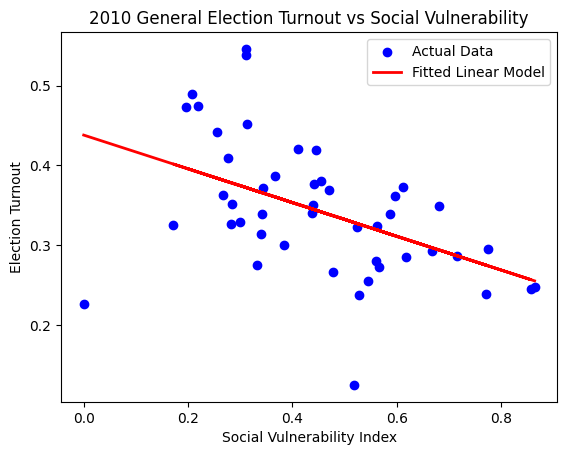

In [53]:
x = subset_svidx_voter_turnout["SV_IDX"].to_numpy().reshape(-1, 1)
y = subset_svidx_voter_turnout["General_2010"].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Create the scatterplot
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot the linear model
plt.plot(x, y_pred, color='red', linewidth=2, label="Fitted Linear Model")

# Customize the plot
plt.title("2010 General Election Turnout vs Social Vulnerability")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Election Turnout")
plt.legend()

# Show the plot
plt.show()

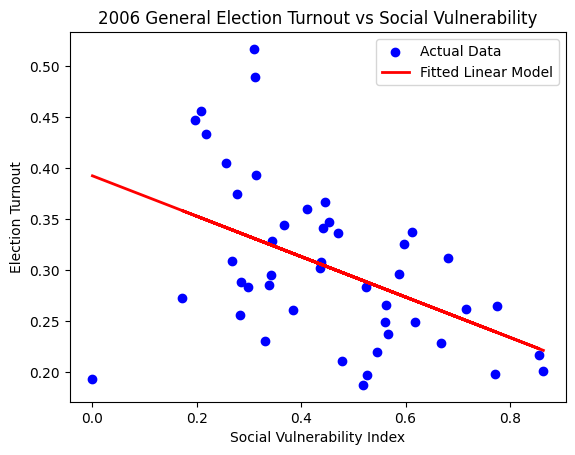

In [54]:
x = subset_svidx_voter_turnout["SV_IDX"].to_numpy().reshape(-1, 1)
y = subset_svidx_voter_turnout["General_2006"].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Create the scatterplot
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot the linear model
plt.plot(x, y_pred, color='red', linewidth=2, label="Fitted Linear Model")

# Customize the plot
plt.title("2006 General Election Turnout vs Social Vulnerability")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Election Turnout")
plt.legend()

# Show the plot
plt.show()

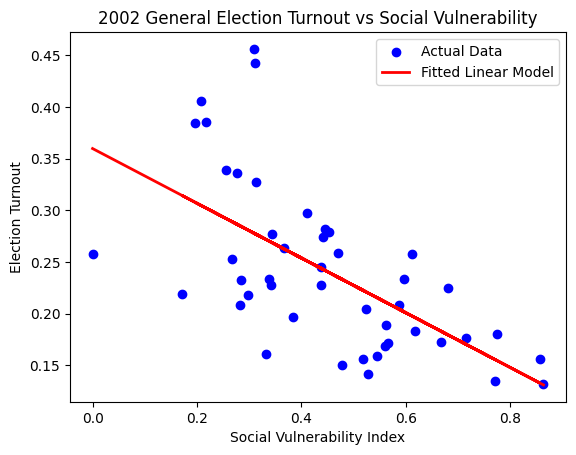

In [55]:
x = subset_svidx_voter_turnout["SV_IDX"].to_numpy().reshape(-1, 1)
y = subset_svidx_voter_turnout["General_2002"].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Create the scatterplot
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot the linear model
plt.plot(x, y_pred, color='red', linewidth=2, label="Fitted Linear Model")

# Customize the plot
plt.title("2002 General Election Turnout vs Social Vulnerability")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Election Turnout")
plt.legend()

# Show the plot
plt.show()